In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.simplefilter("default")

!pip install geatpy==2.2.3
import geatpy as ea
from sklearn.linear_model import LinearRegression

# Any results you write to the current directory are saved as output.

     |████████████████████████████████| 8.8MB 4.3MB/s 


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/_pytest/mark/structures.py:378: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-

# Problems:

## ZJZ Problem

In [2]:
import geatpy as ea

class ModifiedFDA2Problem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'ZDT1' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [1] * M # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 20 # 初始化Dim（决策变量维数）
        self.DIM = Dim
        varTypes = [0] * Dim # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [-1] * Dim # 决策变量下界
        ub = [2] * Dim # 决策变量上界
        lb[0] = 0
        ub[0] = 1
        lbin = [1] * Dim # 决策变量下边界
        ubin = [1] * Dim # 决策变量上边界
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
        self.algorithm_reference = None
        self.nt = 10
        self.T = 1
        self.num_evaluations = 30
        self.eps = 1e-20
    
    def aimFunc(self, pop): # 目标函数
        Vars = pop.Phen # 得到决策变量矩阵
        ObjV1 = Vars[:, 0]
        gt = np.sin(0.5 * np.pi * (1 / self.nt) * (self.T))
        ht = 1.5 + gt
        gx = 1 + np.sum((Vars[:, 1:] + gt - ObjV1.reshape((len(Vars), 1)) ** (ht)) ** 2, 1)
        ObjV2 = 1 - (ObjV1 / gx) ** ht
        ObjV1[np.abs(ObjV1) < self.eps] = 0
        ObjV2[np.abs(ObjV2) < self.eps] = 0
        pop.ObjV = np.array([ObjV1, ObjV2]).T
        # 计算可行性矩阵
        
    def calObjV(self, array):
        Vars = array # 得到决策变量矩阵
        ObjV1 = Vars[:, 0]
        gt = np.sin(0.5 * np.pi * (1 / self.nt) * (self.T))
        ht = 1.5 + gt
        gx = 1 + np.sum((Vars[:, 1:] + gt - ObjV1.reshape((len(Vars), 1)) ** (ht)) ** 2, 1)
        ObjV2 = 1 - (ObjV1 / gx) ** ht
        ObjV1[np.abs(ObjV1) < self.eps] = 0
        ObjV2[np.abs(ObjV2) < self.eps] = 0
        return np.array([ObjV1, ObjV2]).T
    
    def calBest(self): # 计算全局最优解
        N = 10000 # 生成10000个参考点
        ObjV1 = np.linspace(0, 1, N)
        gt = np.sin(0.5 * np.pi * (1 / self.nt) * (self.T))
        ht = 1.5 + gt
        ObjV2 = 1 - ObjV1 ** ht
        globalBestObjV = np.array([ObjV1, ObjV2]).T
        
        return globalBestObjV

## FDA3 Problem

In [3]:
import geatpy as ea

class FDA3Problem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'ZDT1' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [1] * M # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 20 # 初始化Dim（决策变量维数）
        self.DIM = Dim
        varTypes = [0] * Dim # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [-1] * Dim # 决策变量下界
        ub = [1] * Dim # 决策变量上界
        lb[0] = 0
        lbin = [1] * Dim # 决策变量下边界
        ubin = [1] * Dim # 决策变量上边界
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
        self.algorithm_reference = None
        self.nt = 2
        self.T = 1
        self.num_evaluations = 30
        self.eps = 1e-20
    
    def aimFunc(self, pop): # 目标函数
        Vars = pop.Phen # 得到决策变量矩阵
        t = (1 / self.nt) * (self.T)
        gt = abs(np.sin(0.5 * np.pi * (1 / self.nt) * (self.T)))
        ft = 10 ** (2 * np.sin(0.5 * np.pi * t))
        ObjV1 = abs(Vars[:, 0]) ** ft
        gx = 1 + gt + np.sum((Vars[:, 1:] - gt) ** 2, 1)
        hx = 1 - np.sqrt(ObjV1 / gx)
        ObjV2 = gx * hx
        ObjV1[np.abs(ObjV1) < self.eps] = 0
        ObjV2[np.abs(ObjV2) < self.eps] = 0
        pop.ObjV = np.array([ObjV1, ObjV2]).T
        
    
    def calBest(self): # 计算全局最优解
        N = 10000 # 生成10000个参考点
        t = (1 / self.nt) * (self.T)
        gt = abs(np.sin(0.5 * np.pi * (1 / self.nt) * (self.T)))
        ft = 10 ** (2 * np.sin(0.5 * np.pi * t))
        ObjV1 = np.linspace(0, 1, N) ** ft
        ObjV2 = (1 - np.sqrt(ObjV1 / (1 + gt))) * (1 + gt)
        globalBestObjV = np.array([ObjV1, ObjV2]).T
        return globalBestObjV

## FDA2 Problem

In [4]:
import geatpy as ea

class FDA2Problem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'ZDT1' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [1] * M # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 20 # 初始化Dim（决策变量维数）
        self.DIM = Dim
        varTypes = [0] * Dim # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        self.IDim = 1
        self.IIDim = 5
        self.IIIDim = Dim - self.IDim - self.IIDim
        lb = [-1] * Dim # 决策变量下界
        ub = [1] * Dim # 决策变量上界
        lb[:self.IDim] = [0 for _ in range(len(lb[:self.IDim]))]
        lbin = [1] * Dim # 决策变量下边界
        ubin = [1] * Dim # 决策变量上边界
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
        self.algorithm_reference = None
        self.nt = 10
        self.T = 1
        self.num_evaluations = 30
        self.eps = 1e-20
    
    def aimFunc(self, pop): # 目标函数
        Vars = pop.Phen # 得到决策变量矩阵
        t = (1 / self.nt) * (self.T)
        ht = 0.75 + 0.7 * np.sin(0.5 * np.pi * t)
        gx = 1 + np.sum(Vars[:, 1:1 + self.IIDim] ** 2, 1)
        ObjV1 = Vars[:, 0]
        hx = 1 - (ObjV1 / gx) ** ((ht + np.sum((Vars[:, 1 + self.IIDim:] - ht) ** 2, 1)) ** (-1))
        ObjV2 = gx * hx
        ObjV1[np.abs(ObjV1) < self.eps] = 0
        ObjV2[np.abs(ObjV2) < self.eps] = 0
        pop.ObjV = np.array([ObjV1, ObjV2]).T
        
    def calObjV(self, array):
        Vars = array.copy() # 得到决策变量矩阵
        t = (1 / self.nt) * (self.T)
        ht = 0.75 + 0.7 * np.sin(0.5 * np.pi * t)
        gx = 1 + np.sum(Vars[:, self.IDim:self.IDim + self.IIDim] ** 2, 1)
        ObjV1 = Vars[:, :self.IDim]
        hx = 1 - (ObjV1 / gx) ** ((ht + np.sum((Vars[:, self.IDim + self.IIDim:] - ht) ** 2, 1)) ** (-1))
        ObjV2 = gx * hx
        ObjV1[np.abs(ObjV1) < self.eps] = 0
        ObjV2[np.abs(ObjV2) < self.eps] = 0
        return np.array([ObjV1, ObjV2]).T
    
    def calBest(self): # 计算全局最优解
        N = 10000 # 生成10000个参考点
        t = (1 / self.nt) * (self.T)
        ObjV1 = np.linspace(0, 1, N)
        ht = 0.75 + 0.7 * np.sin(0.5 * np.pi * t)
        ObjV2 = 1 - ObjV1 ** (ht ** -1)
        globalBestObjV = np.array([ObjV1, ObjV2]).T
        return globalBestObjV

In [5]:
import math
from scipy.optimize import *

def calDistance(anchorpoint1, anchorpoint2, mean_point, points):
    if anchorpoint2[0] - anchorpoint1[0] != 0:
        k = (anchorpoint2[1] - anchorpoint1[1]) / (anchorpoint2[0] - anchorpoint1[0])
    else:
        return False
    if k > 0:
        return False

    b = mean_point[1] - k * mean_point[0]
    A = -k
    B = 1
    C = -b
    return abs(A * points[:, 0] + B * points[:, 1] + C) / math.sqrt(A ** 2 + B ** 2), k, b

def calDistanceGivenKB(k, b, points):
    A = -k
    B = 1
    C = -b
    return abs(A * points[:, 0] + B * points[:, 1] + C) / math.sqrt(A ** 2 + B ** 2)

def calParabolaDistanceGivenKB(a, b, c, points):
    return abs(points[:, 1] - a * (points[:, 0] ** 2) - b * points[:, 0] - c)

def fitCurve(x, a, b, c):
    return a * (x ** 2) + b * x + c

def calParabolaDistance(referenceArray, points):
    data = referenceArray.copy()
    popt, pcov = curve_fit(fitCurve, data[:, 0], data[:, 1])
    a, b, c = popt
    return calParabolaDistanceGivenKB(a, b, c, points), (a, b, c)

def getBestSubPopulation(populationToBeSelect, num, population=None, k=None, b=None):
    # conditions: 
    # 1. The ObjV must be updated, both the population and the populationToBeSelected
    if k == None and b == None:
        if k == None and b == None and population == None:
            raise ValueError("Population Reference and k and b cannot all be None")
        utopia_point1 = population.ObjV[np.argmin(population.ObjV[:,0])]
        utopia_point2 = population.ObjV[np.argmin(population.ObjV[:,1])]
        mean_point = np.mean(population.ObjV, 0)
        
        temp = calDistance(utopia_point1, utopia_point2, mean_point, populationToBeSelect.ObjV)
        if temp == False:
            return None
        else:
            distances, k, b = temp
    else:
        distances = calDistanceGivenKB(k, b, populationToBeSelect.ObjV)
    #idxes = np.argpartition(distances, num)[:num]
    
    # construct the dict:
    dist_info = {i:distances[i] for i in range(len(populationToBeSelect))}
    dist_info = dist_info.items()
    # sort the distances
    dist_info = sorted(dist_info, key=lambda x:x[1])
    indexes = []
    counter = {i:0 for i in range(50)}
    for i in range(len(populationToBeSelect)):
        if len(indexes) >= num:
            break
        interval = populationToBeSelect.ObjV[dist_info[i][0]][0] // (1 / 50)
        if counter[interval] >= (num // 50):
            continue
        else:
            indexes.append(dist_info[i][0])
            counter[interval] = counter[interval] + 1
    
    while len(indexes) < num:
        indexes = indexes + indexes[:num - len(indexes)]

    return populationToBeSelect[indexes], (k, b)

def getBestSubPopulation_Parabola(populationToBeSelect, num, population=None, a=None, b=None, c=None):
    if a == None and b == None and c == None:
        if a == None and b == None and c == None and population == None:
            raise ValueError("Population Reference and k and b cannot all be None")
        
        distances, (a,b,c) = calParabolaDistance(population.ObjV.copy(), populationToBeSelect.ObjV.copy())
    else:
        distances = calParabolaDistanceGivenKB(a, b, c, populationToBeSelect.ObjV.copy())
    #idxes = np.argpartition(distances, num)[:num]
    
    # construct the dict:
    dist_info = {i:distances[i] for i in range(len(populationToBeSelect))}
    dist_info = dist_info.items()
    # sort the distances
    dist_info = sorted(dist_info, key=lambda x:x[1])
    indexes = []
    counter = {i:0 for i in range(10)}
    for i in range(len(populationToBeSelect)):
        interval = populationToBeSelect.ObjV[i][0] // 0.05
        if counter[interval] >= 5:
            continue
        else:
            indexes.append(i)
            counter[interval] = counter[interval] + 1
    
    return populationToBeSelect[indexes], (a, b, c)

In [6]:
# input: N * p
# N: number of entities, p: number of timesteps used to calculate the point location
from sklearn.linear_model import LinearRegression

def segment_timeseriesToData(timeseries, time_p, starting_time):
    #input: 1d array
    #time_p: time span used for training
    #starting_time: starting time for training the data
    result = []
    targets = []
    for i in range(starting_time, len(timeseries) - time_p - 1):
        result.append(timeseries[i:i + time_p])
        targets.append(timeseries[i + time_p])
    
    return (np.array(result), np.array(targets).reshape(-1, 1))

def reinitializePopulation(population, problem, p):
    newPopulation = population.copy()
    newPopulation.initChrom()
    for i in range(len(population)):
        if np.random.uniform() < p:
            population.Chrom[i] = newPopulation.Chrom[i]

def fit_predict(timeseries, time_p, starting_time):
    #input: 1d array
    #time_p: time span used for training
    #starting_time: starting time for training the data
    train_X, train_Y = segment_timeseriesToData(timeseries, time_p, starting_time)
    reg = LinearRegression()
    reg.fit(train_X, train_Y)
    score = reg.score(train_X, train_Y)
    # predict the output:
    return float(reg.predict(np.array(timeseries[len(timeseries) - time_p : len(timeseries)]).reshape(1, -1))), score

def plotParabola(a, b, c, title):
    data_x = np.linspace(0, 1, 100)
    data_y = a * data_x ** 2 + b * data_x + c
    plt.plot(data_x, data_y)
    plt.title(title)
    plt.show()
    
def plotLine(k, b, title):
    data_x = np.linspace(0, 1, 100)
    data_y = k * data_x + b
    plt.plot(data_x, data_y)
    plt.title(title)
    plt.show()
    
def copyPopulation(population, mul_factor):
    # 2 ^ mul_factor
    for i in range(mul_factor):
        population = population + population
    return population

In [7]:
# input: chroms: chroms up until current timestep:
# time_p: time span used to predict the next time series value
# starting_time: starting time used to span the time series data:
# fit_predict(timeseries, time_p, starting_time)

def manifoldsdistance(manifold1, manifold2):
    # input dimension(same): N * m
    total_distance = 0
    for i in range(manifold1.shape[0]):
        # manifold1[i].reshape(1, -1): 1 * m
        distanceArray = np.sqrt(np.sum((manifold1[i].reshape(1, -1) - manifold2) ** 2, 1))
        # distanceArray: (N,) (distance between ith identity of manifold1 to all the manifolds2)
        # add the total_distance with the min value of the i'th identity to the manifold 2
        total_distance = total_distance + min(distanceArray)
    return total_distance / manifold1.shape[0]

def predictChrom(chroms, time_p, starting_time):
    # 1. get the mean values of every dimension of decision vector:
    # 2. chroms: T * N * m
    if chroms.shape[0] <= 3:
        raise Exception("The total time series used for prediction should be larger than 3!")
    mean_centers = []
    for i in range(len(chroms)):
        mean_centers.append(np.mean(chroms[i], 0))
    # mean_centers: T * m dimension
    mean_centers = np.array(mean_centers)
    
    # fit and predict every dimension of the data:
    center_predict = np.zeros((1, mean_centers.shape[1]))
    for i in range(mean_centers.shape[1]):
        # i is the dimension of the dicision vector:
        center_predict[0, i] = fit_predict(mean_centers[:, i], time_p, starting_time)[0]
    # center_predict: 1 * m
    
    # 3. calculate the manifolds:
    # manifolds: T * N * m
    # chrom: T * N * m
    # mean_centers: T * m
    manifolds = chroms - mean_centers.reshape((chroms.shape[0], 1, chroms.shape[2]))
    # calculate the variance of the distribution of manifolds (sigma(m, i)):
    var = (1 / chroms.shape[0]) * (manifoldsdistance(manifolds[-1], manifolds[-2])) ** 2
    # get the variations of the manifolds of : (manifold(t+1, i) = manifold(t, i) + variation)
    # variation: N * m
    variation = np.random.normal(0, var, (chroms.shape[1], chroms.shape[2]))
    manofold_pred =  manifolds[-1] + variation
    # manofold_pred: N * m
    return center_predict + manofold_pred
    # returned dimension: N * m

def pusAndReplaceElements(queue, element, cap=2):
    if len(queue) < cap:
        queue.append(element)
    else:
        for i in range(cap - 1):
            queue[i] = queue[i + 1]
        queue[-1] = element
    return queue

In [8]:
def predictChromSlidingWindow(chroms, time_p, startingTimeList, problem):
    centerList = []
    varList = []
    chroms = np.array(chroms)

    for starting_time in startingTimeList:
        # 1. get the mean values of every dimension of decision vector:
        # 2. chroms: T * N * m
        
        if starting_time < (5 + time_p) or len(chroms) - starting_time < 0:
            continue

        starting_time = len(chroms) - starting_time
        mean_centers = []
        for i in range(len(chroms)):
            mean_centers.append(np.mean(chroms[i], 0))
        # mean_centers: T * m dimension
        mean_centers = np.array(mean_centers)

        # fit and predict every dimension of the data:
        center_predict = np.zeros((1, mean_centers.shape[1]))
        for i in range(mean_centers.shape[1]):
            # i is the dimension of the dicision vector:
            center_predict[0, i] = fit_predict(mean_centers[:, i], time_p, starting_time)[0]
        # center_predict: 1 * m

        # 3. calculate the manifolds:
        # manifolds: T * N * m
        # chrom: T * N * m
        # mean_centers: T * m
        manifolds = chroms - mean_centers.reshape((chroms.shape[0], 1, chroms.shape[2]))
        # calculate the variance of the distribution of manifolds (sigma(m, i)):
        var = (1 / chroms.shape[0]) * (manifoldsdistance(manifolds[-1], manifolds[-2])) ** 2
        # get the variations of the manifolds of : (manifold(t+1, i) = manifold(t, i) + variation)
        # variation: N * m
        variation = np.random.normal(0, var, (chroms.shape[1], chroms.shape[2]))
        manofold_pred =  manifolds[-1] + variation
        # manofold_pred: N * m
        centerList.append(center_predict)
        varList.append(manofold_pred)
        #return center_predict + manofold_pred
        # returned dimension: N * m
    
    return np.mean(np.array(centerList), 0) + np.mean(np.array(varList), 0)

def fitPredictSlidingWindow(timeseries, time_p, startingTimeList, weights):
    outputs = []
    index = np.argmax(weights)
    for i, starting_time in enumerate(startingTimeList):
        if starting_time < (3 + time_p) or i != index:
            continue
        starting_time = len(timeseries) - starting_time
        outputs.append(fit_predict(timeseries, time_p, max(starting_time, 0))[0])

    return outputs[0]

# Algorithms:

## RIS (Random Reinitialization)

In [9]:
class Algorithm_RIS(ea.moea_NSGA2_DE_templet):
    def run(self):
        #==========================初始化配置===========================
        population = self.population
        NIND = population.sizes
        self.initialization() # 初始化算法模板的一些动态参数
        #===========================准备进化============================
        if population.Chrom is None:
            population.initChrom() # 初始化种群染色体矩阵（内含解码，详见Population类的源码）
        else:
            population.Phen = population.decoding() # 染色体解码
        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        [levels, criLevel] = self.ndSort(self.problem.maxormins * population.ObjV, NIND, None, population.CV) # 对NIND个个体进行非支配分层
        population.FitnV[:, 0] = 1 / levels # 直接根据levels来计算初代个体的适应度
        #===========================开始进化============================
        while self.terminated(population) == False:
            if self.currentGen in range(5000):
                self.problem.nt = 5
            elif self.currentGen in range(5000, 10000):
                self.problem.nt = 10
            else:
                self.problem.nt = 2
            self.problem.T = self.currentGen // self.problem.num_evaluations
            
            if self.currentGen % self.problem.num_evaluations == 0:
                reinitializePopulation(population, self.problem, 0.2)
                # filter out overflow samples
                population.Chrom = ea.mutgau(population.Encoding, population.Chrom, population.Field, Pm=1, Sigma=0)
            
            # 进行差分进化操作
            r0 = ea.selecting(self.selFunc, population.FitnV, NIND) # 得到基向量索引
            offspring = population.copy() # 存储子代种群
            offspring.Chrom = self.mutOper.do(offspring.Encoding, offspring.Chrom, offspring.Field, r0) # 变异
            tempPop = population + offspring # 当代种群个体与变异个体进行合并（为的是后面用于重组）
            offspring.Chrom = self.recOper.do(tempPop.Chrom) # 重组
            # 求进化后个体的目标函数值
            offspring.Phen = offspring.decoding() # 染色体解码
            self.problem.aimFunc(offspring)
            self.evalsNum += offspring.sizes # 更新评价次数
            # 重插入生成新一代种群
            population = self.reinsertion(population, offspring, NIND)
            population.Phen = population.decoding()
            self.problem.aimFunc(population)
            
            # calculate the MIGD values
            if (self.currentGen + 1) % self.problem.num_evaluations == 0:
                IGDs.append(ea.indicator.IGD(population.ObjV, self.problem.calBest()))
                HVs.append(ea.indicator.HV(population.ObjV, self.problem.calBest()))

        # finish the optimization:
        population = self.finishing(population)
        
        return population # 调用finishing完成后续工作并返回结果

## Prediction-Based Population Re-initialization (FPS)

In [10]:
def get_distance_matrix(m, n, pt1, pt2):
    distance_matrix = []
    for i in range(m):
        dist = np.sum((pt1[i].reshape(1, n) - pt2) ** 2, 1).T.copy() # 1 * m
        distance_matrix.append(dist)
    distance_matrix = np.array(distance_matrix)
    
    return distance_matrix

class Algorithm_FPS(ea.moea_NSGA2_DE_templet):
    def run(self):
        #==========================初始化配置===========================
        population = self.population
        NIND = population.sizes
        self.initialization() # 初始化算法模板的一些动态参数

        prediction_scores = []        
        # 定义模型群体（总共50个）：
        sequenceList = list(range(100))                                # 追踪记录当前poulation matrix下(chrome 和 phen)，每个个体的编号
        pred_population = None                                          # 用于存储预测的种群
        last_population_chrom = None                                          # 存储上以时间步的种群
        #===========================准备进化============================
        if population.Chrom is None:
            population.initChrom() # 初始化种群染色体矩阵（内含解码，详见Population类的源码）
        else:
            population.Phen = population.decoding() # 染色体解码
        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        [levels, criLevel] = self.ndSort(self.problem.maxormins * population.ObjV, NIND, None, population.CV) # 对NIND个个体进行非支配分层
        population.FitnV[:, 0] = 1 / levels # 直接根据levels来计算初代个体的适应度
        #===========================开始进化============================
        while self.terminated(population) == False:
            if self.currentGen in range(5000):
                self.problem.nt = 5
            elif self.currentGen in range(5000, 10000):
                self.problem.nt = 10
            else:
                self.problem.nt = 2
            self.problem.T = self.currentGen // self.problem.num_evaluations

            # 选择个体参与进化
            if self.currentGen % self.problem.num_evaluations == 1 and pred_population != None and self.currentGen // self.problem.num_evaluations >= 3:  # 如果有预测个体并且是第十时间步之后，则加入到种群中
                offspring = pred_population
            else:                        # 如果暂时还没有预测个体，则用普通的选择方式
                offspring = population[ea.selecting(self.selFunc, population.FitnV, NIND)]
            
            # 进行差分进化操作
            r0 = ea.selecting(self.selFunc, population.FitnV, NIND) # 得到基向量索引
            #offspring = population.copy() # 存储子代种群
            offspring.Chrom = self.mutOper.do(offspring.Encoding, offspring.Chrom, offspring.Field, r0) # 变异
            tempPop = population + offspring # 当代种群个体与变异个体进行合并（为的是后面用于重组）
            offspring.Chrom = self.recOper.do(tempPop.Chrom) # 重组
            # 求进化后个体的目标函数值
            offspring.Phen = offspring.decoding() # 染色体解码
            self.problem.aimFunc(offspring)
            self.evalsNum += offspring.sizes # 更新评价次数
            # 重插入生成新一代种群
            population = self.reinsertion(population, offspring, NIND)
            population.Phen = population.decoding()
            self.problem.aimFunc(population)
            
            if (self.currentGen + 1) % self.problem.num_evaluations == 0:
                IGDs.append(ea.indicator.IGD(population.ObjV, self.problem.calBest()))
                HVs.append(ea.indicator.HV(population.ObjV, self.problem.calBest()))
            
            if self.currentGen % self.problem.num_evaluations == 0:
                if self.currentGen // self.problem.num_evaluations >= 2:
                                        
                    # 计算个体的对应关系:
                    distance_matrix = get_distance_matrix(len(population), last_population_chrom.shape[1], population.Chrom, last_population_chrom) #（距离矩阵）
                    correspondence_list = np.argmin(distance_matrix, 1)                             # 当前时间步的行 --> 上一时间步的行
                    newSequenceList = list([1 for i in range(100)])
                    for i in range(len(population)):
                        newSequenceList[i] = sequenceList[correspondence_list[i]]
                    # newSequenceList现在记录了当前时间步下，矩阵每行和个体id的对应关系，行 --> id
                    # sequenceList记录了上一个实践部，矩阵每行和个体id的对应关系
                    # 更新模型：
                    predicted_chromes = []
                    for i in range(len(population)):                                                # i代表了当前时间步下行数为i的个体
                        # 得到当前时间步下i行个体的id：
                        instance = population.Chrom[i].copy()
                        instance_id = newSequenceList[i]
                        
                        # 得到该行个体上一时间步的个体的基因：
                        laststepchrome = last_population_chrom[correspondence_list[i]]
                        
                        # 预测下一时间步的个体：
                        predicted_chromes.append(instance.reshape(-1) + (instance.reshape(-1) - laststepchrome.reshape(-1)) * 1)
                    
                    pred_population = ea.Population(population.Encoding, 
                                                population.Field, 
                                                100)
                    
                    pred_population.initChrom()
                    pred_population.Chrom = np.array(predicted_chromes).reshape(-1, pred_population.Chrom.shape[1])
                    pred_population.Chrom = ea.mutgau(pred_population.Encoding, pred_population.Chrom, pred_population.Field, Pm=1, Sigma=0)
                    pred_population.Phen = pred_population.decoding()
                    self.problem.aimFunc(pred_population)
                    self.problem.aimFunc(population)
                    sequenceList = newSequenceList
                    
                # 记录当前时间步结束后的种群的染色体：
                last_population_chrom = population.Chrom.copy()

        population = self.finishing(population) # 调用finishing完成后续工作并返回结果
        
        return population

## PPS(Population Prediction Strategy)

In [11]:
class Algorithm_PPS(ea.moea_NSGA2_DE_templet):
    def run(self):
        #==========================初始化配置===========================
        population = self.population
        NIND = population.sizes
        self.initialization() # 初始化算法模板的一些动态参数
        #===========================准备进化============================
        if population.Chrom is None:
            population.initChrom() # 初始化种群染色体矩阵（内含解码，详见Population类的源码）
        else:
            population.Phen = population.decoding() # 染色体解码
        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        [levels, criLevel] = self.ndSort(self.problem.maxormins * population.ObjV, NIND, None, population.CV) # 对NIND个个体进行非支配分层
        population.FitnV[:, 0] = 1 / levels # 直接根据levels来计算初代个体的适应度
        
        # array used to store the chroms of every timesteps:
        self.chroms = []
        #===========================开始进化============================
        while self.terminated(population) == False:
            if self.currentGen in range(5000):
                self.problem.nt = 5
            elif self.currentGen in range(5000, 10000):
                self.problem.nt = 10
            else:
                self.problem.nt = 2
            self.problem.T = self.currentGen // self.problem.num_evaluations
            
            if self.currentGen % self.problem.num_evaluations == 0 and self.currentGen // self.problem.num_evaluations >= 10:
                population.Chrom = predictChrom(np.array(self.chroms), 3, 0)
                population.Chrom = ea.mutgau(population.Encoding, population.Chrom, population.Field, Pm=1, Sigma=0)
            
            # 进行差分进化操作
            r0 = ea.selecting(self.selFunc, population.FitnV, NIND) # 得到基向量索引
            offspring = population.copy() # 存储子代种群
            offspring.Chrom = self.mutOper.do(offspring.Encoding, offspring.Chrom, offspring.Field, r0) # 变异
            tempPop = population + offspring # 当代种群个体与变异个体进行合并（为的是后面用于重组）
            offspring.Chrom = self.recOper.do(tempPop.Chrom) # 重组
            # 求进化后个体的目标函数值
            offspring.Phen = offspring.decoding() # 染色体解码
            self.problem.aimFunc(offspring)
            self.evalsNum += offspring.sizes # 更新评价次数
            # 重插入生成新一代种群
            population = self.reinsertion(population, offspring, NIND)
            population.Phen = population.decoding()
            self.problem.aimFunc(population)
            
            # insert the population again to the 
            population = self.reinsertion(population, offspring, NIND)
            self.problem.aimFunc(population)
            
            # calculate the MIGD values
            if (self.currentGen + 1) % self.problem.num_evaluations == 0:
                IGDs.append(ea.indicator.IGD(population.ObjV, self.problem.calBest()))
                HVs.append(ea.indicator.HV(population.ObjV, self.problem.calBest()))
                # add the chrom of the T right before the changes to the chrom list:
                self.chroms.append(population.Chrom.copy())

        # finish the optimization:
        population = self.finishing(population)
        
        return population # 调用finishing完成后续工作并返回结果

In [12]:
def pusAndReplaceElements(queue, element, cap=2):
    if len(queue) < cap:
        queue.append(element)
    else:
        for i in range(cap - 1):
            queue[i] = queue[i + 1]
        queue[-1] = element
    return queue

def getEvenSequence(sequence):
    lst = []
    for i, element in enumerate(sequence):
        if i % 2 == 0:
            lst.append(element)
    return lst

def getDifferenceVectors(sequence, time_p, starting_time):
    train_X, targets = segment_timeseriesToData(sequence, time_p, starting_time)
    result_List = []
    for i, x in enumerate(train_X):
        lst = []
        for j in range(1, train_X.shape[1]):
            lst.append(x[j] - x[j - 1])
        result_List.append(lst)
    return np.array(result_List)

def getMainAxis(matrix):
    return [matrix[i, i] for i in range(len(matrix))]

## Proposed Method (COLPPS)

In [13]:
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
import math

class Algorithm_Ensemble(ea.moea_NSGA2_DE_templet):
    def run(self):
        #==========================初始化配置===========================
        population = self.population
        NIND = population.sizes
        self.initialization() # 初始化算法模板的一些动态参数
        #===========================准备进化============================
        if population.Chrom is None:
            population.initChrom() # 初始化种群染色体矩阵（内含解码，详见Population类的源码）
        else:
            population.Phen = population.decoding() # 染色体解码
        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        [levels, criLevel] = self.ndSort(self.problem.maxormins * population.ObjV, NIND, None, population.CV) # 对NIND个个体进行非支配分层
        population.FitnV[:, 0] = 1 / levels # 直接根据levels来计算初代个体的适应度

        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        self.klist = []
        self.blist = []
        self.directGen = 5
        self.t_BeginPredict = 10
        self.timespanp = 3
        self.k_pred = None
        self.b_pred = 0
        self.executed_los = False
        self.last_change_detected_gen = 0
        # self.chromQueue = []
        # array used to store the chroms of every timesteps:
        self.chroms = []
        predictedChromMean = None
        self.losses = []
        self.lossRecords = []
        lastCDT = 0
        #===========================开始进化============================
        while self.terminated(population) == False:
            if self.currentGen in range(5000):
                self.problem.nt = 5
            elif self.currentGen in range(5000, 10000):
                self.problem.nt = 10
            else:
                self.problem.nt = 2
            self.problem.T = self.currentGen // self.problem.num_evaluations
            
            #===================0. change detection and operations===========================
            if self.currentGen % self.problem.num_evaluations == 0 and self.currentGen != 0:
                #=================================STATUS UPDATE==============================
                self.last_change_detected_gen = self.currentGen
                # calculate current k, b and update the parameter list:
                
                #=================================Get Current Latest k and b=================
                temp = getBestSubPopulation(population, len(population), population)
                if temp != None:
                    _, (k, b) = temp
                else:
                    k = -1
                    b = 0
                self.klist.append(k)
                self.blist.append(b)
                
                if self.problem.T - lastCDT >= 20:
                    mean, std = np.array(self.losses[:-1]).mean(), np.array(self.losses[:-1]).std(ddof=1)
                    conf_intveral = stats.norm.interval(0.95, loc=mean, scale=std)
                    if self.losses[-1] > conf_intveral[1]:
                        lastCDT = self.problem.T
                        print('clear')
                        self.klist = []#getEvenSequence(self.klist)
                        self.blist = []#getEvenSequence(self.blist)
                        self.chroms = []#getEvenSequence(self.chroms)
                        self.losses = []
                        population.initChrom()
                        population.Phen = population.decoding()
                        self.problem.aimFunc(population)
                
                #================================Predict the k and b=========================
                if len(self.klist) > self.t_BeginPredict:
                    self.k_pred, _ = fit_predict(self.klist, self.timespanp, 0)
                    population.Chrom = predictChrom(np.array(self.chroms), self.timespanp, 0)
                    population.Chrom = ea.mutgau(population.Encoding, population.Chrom, population.Field, Pm=1, Sigma=0)
                    predictedChromMean = np.mean(population.Chrom, 0)

            self.executed_los = False
            
            #====================1. check if the condition is currently unstable (needs supervisions)================================
            if  (len(self.klist) > self.t_BeginPredict and (self.currentGen - self.last_change_detected_gen) <= self.directGen):

                # calculate the predictions and try to accelerate the convergence speed:
                population_Original = population.copy()
                #=================================copy and paste the population and do the mutation=========================
                population = copyPopulation(population, 1)
                #===========================================================================================================
                population.Chrom = ea.mutpolyn(population.Encoding, population.Chrom, population.Field, Pm=0.9) # hyperMutation
                # The following 2 steps are required as the getBestSubPopulation need to get the ObjV of the newly generated solution, 
                # but the nd_sort is not and also cannot needed as the number of identities is very large
                population.Phen = population.decoding()
                self.problem.aimFunc(population)

                # test the dominated hyperplane
                population, _ = getBestSubPopulation(population, NIND, k=self.k_pred, b=self.b_pred)
                self.executed_los = True
            
            #=================================================1. ENDS================================================================

            if self.executed_los == False:
                # 进行差分进化操作
                r0 = ea.selecting(self.selFunc, population.FitnV, NIND) # 得到基向量索引
                offspring = population.copy() # 存储子代种群
                offspring.Chrom = self.mutOper.do(offspring.Encoding, offspring.Chrom, offspring.Field, r0) # 变异
                tempPop = population + offspring # 当代种群个体与变异个体进行合并（为的是后面用于重组）
                offspring.Chrom = self.recOper.do(tempPop.Chrom) # 重组
                # 求进化后个体的目标函数值
                offspring.Phen = offspring.decoding() # 染色体解码
                self.problem.aimFunc(offspring)
                self.evalsNum += offspring.sizes # 更新评价次数
                # 重插入生成新一代种群
                population = self.reinsertion(population, offspring, NIND)
                population.Phen = population.decoding()
                self.problem.aimFunc(population)
            
            #=========================================2. check if the problem is going to change=============================
            # calculate the MIGD values
            if (self.currentGen + 1) % self.problem.num_evaluations == 0:
                if not predictedChromMean is None:
                    self.losses.append(np.mean((np.mean(population.Chrom, 0) - predictedChromMean) ** 2))
                    self.lossRecords.append(np.mean((np.mean(population.Chrom, 0) - predictedChromMean) ** 2))
                IGDs.append(ea.indicator.IGD(population.ObjV, self.problem.calBest()))
                HVs.append(ea.indicator.HV(population.ObjV, self.problem.calBest()))
                self.chroms.append(population.Chrom.copy())
                
            #====================================================2. ENDS=======================================================

        # finish the optimization:
        population = self.finishing(population)
        
        return population # 调用finishing完成后续工作并返回结果

## Proposed Method (COLPPS), No Concept Drift Detection and Restarting

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
import math

class Algorithm_Ensemble_NoCD(ea.moea_NSGA2_DE_templet):
    def run(self):
        #==========================初始化配置===========================
        population = self.population
        NIND = population.sizes
        self.initialization() # 初始化算法模板的一些动态参数
        #===========================准备进化============================
        if population.Chrom is None:
            population.initChrom() # 初始化种群染色体矩阵（内含解码，详见Population类的源码）
        else:
            population.Phen = population.decoding() # 染色体解码
        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        [levels, criLevel] = self.ndSort(self.problem.maxormins * population.ObjV, NIND, None, population.CV) # 对NIND个个体进行非支配分层
        population.FitnV[:, 0] = 1 / levels # 直接根据levels来计算初代个体的适应度

        self.problem.aimFunc(population) # 计算种群的目标函数值
        self.evalsNum = population.sizes # 记录评价次数
        self.klist = []
        self.blist = []
        self.directGen = 5
        self.t_BeginPredict = 10
        self.timespanp = 3
        self.k_pred = None
        self.b_pred = 0
        self.executed_los = False
        self.last_change_detected_gen = 0
        # self.chromQueue = []
        # array used to store the chroms of every timesteps:
        self.chroms = []
        predictedChromMean = None
        self.losses = []
        self.lossRecords = []
        lastCDT = 0
        #===========================开始进化============================
        while self.terminated(population) == False:
            if self.currentGen in range(5000):
                self.problem.nt = 5
            elif self.currentGen in range(5000, 10000):
                self.problem.nt = 10
            else:
                self.problem.nt = 2
            self.problem.T = self.currentGen // self.problem.num_evaluations
            
            #===================0. change detection and operations===========================
            if self.currentGen % self.problem.num_evaluations == 0 and self.currentGen != 0:
                #=================================STATUS UPDATE==============================
                self.last_change_detected_gen = self.currentGen
                # calculate current k, b and update the parameter list:
                
                #=================================Get Current Latest k and b=================
                temp = getBestSubPopulation(population, len(population), population)
                if temp != None:
                    _, (k, b) = temp
                else:
                    k = -1
                    b = 0
                self.klist.append(k)
                self.blist.append(b)
                
                """
                if self.problem.T - lastCDT >= 20:
                    mean, std = np.array(self.losses[:-1]).mean(), np.array(self.losses[:-1]).std(ddof=1)
                    conf_intveral = stats.norm.interval(0.95, loc=mean, scale=std)
                    if self.losses[-1] > conf_intveral[1]:
                        lastCDT = self.problem.T
                        print('clear')
                        self.klist = []#getEvenSequence(self.klist)
                        self.blist = []#getEvenSequence(self.blist)
                        self.chroms = []#getEvenSequence(self.chroms)
                        self.losses = []
                        population.initChrom()
                        population.Phen = population.decoding()
                        self.problem.aimFunc(population)
                """
                
                #================================Predict the k and b=========================
                if len(self.klist) > self.t_BeginPredict:
                    self.k_pred, _ = fit_predict(self.klist, self.timespanp, 0)
                    population.Chrom = predictChrom(np.array(self.chroms), self.timespanp, 0)
                    population.Chrom = ea.mutgau(population.Encoding, population.Chrom, population.Field, Pm=1, Sigma=0)
                    predictedChromMean = np.mean(population.Chrom, 0)

            self.executed_los = False
            
            #====================1. check if the condition is currently unstable (needs supervisions)================================
            if  (len(self.klist) > self.t_BeginPredict and (self.currentGen - self.last_change_detected_gen) <= self.directGen):

                # calculate the predictions and try to accelerate the convergence speed:
                population_Original = population.copy()
                #=================================copy and paste the population and do the mutation=========================
                population = copyPopulation(population, 2)
                #===========================================================================================================
                population.Chrom = ea.mutpolyn(population.Encoding, population.Chrom, population.Field, Pm=0.9) # hyperMutation
                # The following 2 steps are required as the getBestSubPopulation need to get the ObjV of the newly generated solution, 
                # but the nd_sort is not and also cannot needed as the number of identities is very large
                population.Phen = population.decoding()
                self.problem.aimFunc(population)

                # test the dominated hyperplane
                population, _ = getBestSubPopulation(population, NIND, k=self.k_pred, b=self.b_pred)
                self.executed_los = True
            
            #=================================================1. ENDS================================================================

            if self.executed_los == False:
                # 进行差分进化操作
                r0 = ea.selecting(self.selFunc, population.FitnV, NIND) # 得到基向量索引
                offspring = population.copy() # 存储子代种群
                offspring.Chrom = self.mutOper.do(offspring.Encoding, offspring.Chrom, offspring.Field, r0) # 变异
                tempPop = population + offspring # 当代种群个体与变异个体进行合并（为的是后面用于重组）
                offspring.Chrom = self.recOper.do(tempPop.Chrom) # 重组
                # 求进化后个体的目标函数值
                offspring.Phen = offspring.decoding() # 染色体解码
                self.problem.aimFunc(offspring)
                self.evalsNum += offspring.sizes # 更新评价次数
                # 重插入生成新一代种群
                population = self.reinsertion(population, offspring, NIND)
                population.Phen = population.decoding()
                self.problem.aimFunc(population)
            
            #=========================================2. check if the problem is going to change=============================
            # calculate the MIGD values
            if (self.currentGen + 1) % self.problem.num_evaluations == 0:
                if not predictedChromMean is None:
                    self.losses.append(np.mean((np.mean(population.Chrom, 0) - predictedChromMean) ** 2))
                    self.lossRecords.append(np.mean((np.mean(population.Chrom, 0) - predictedChromMean) ** 2))
                IGDs.append(ea.indicator.IGD(population.ObjV, self.problem.calBest()))
                HVs.append(ea.indicator.HV(population.ObjV, self.problem.calBest()))
                self.chroms.append(population.Chrom.copy())
                
            #====================================================2. ENDS=======================================================

        # finish the optimization:
        population = self.finishing(population)
        
        return population # 调用finishing完成后续工作并返回结果

## Settings and Preparations

In [15]:
MAX_GEN = 15000
NIND = 100                                                # 种群规模
num_evaluations = 5

"""================================实例化问题对象==========================="""
problem = ModifiedFDA2Problem()                                   # 生成问题对象
"""==================================种群设置==============================="""
Encoding = 'RI'                                           # 编码方式
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
population = ea.Population(Encoding, Field, NIND)         # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）

# Experiment Runs

Some Parameters and variables:

1. myAlgorithm: optimization algorithm used
2. problem: problem which is tend to be optimized
3. Population: Population of evolutionary algorithm

## RIS Run

用时：33.20072388648987 秒
IGD: 0.3539278473393581
HV: 0.21355178406834602
用时：33.15855121612549 秒
IGD: 0.35665657100732523
HV: 0.2124140967577696
用时：33.12619423866272 秒
IGD: 0.3544581551780858
HV: 0.21293379224836825
用时：35.14276194572449 秒
IGD: 0.35803018166636125
HV: 0.21246431010961533
用时：32.528712034225464 秒
IGD: 0.35463147310930265
HV: 0.21310242058336734
平均IGD:  0.35554084566008637
平均HV： 0.2128932807534931


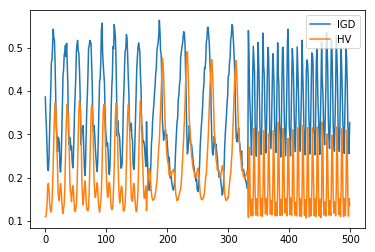

In [16]:
# -*- coding: utf-8 -*-
import geatpy as ea # import geatpy
import matplotlib.pyplot as plt

IGD_List = []
HV_List = []
population = ea.Population(Encoding, Field, NIND)# 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
for i in range(num_evaluations):
    IGDs = []
    HVs = []
    MyAlgorithm = Algorithm_RIS                      # 决定使用哪种基准基因算法
    """================================算法参数设置============================="""
    myAlgorithm = MyAlgorithm(problem, population)   # 实例化一个算法模板对象
    #MyAlgorithm(problem, resultpopulation)
    myAlgorithm.MAXGEN = MAX_GEN                     # 最大进化代数
    myAlgorithm.drawing = 0
    problem.algorithm_reference = myAlgorithm
    """==========================调用算法模板进行种群进化========================"""
    NDSet = myAlgorithm.run()                        # 执行算法模板，得到帕累托最优解集NDSet
    #myAlgorithm.run()
    #NDSet.save()                                     # 把结果保存到文件中
    IGD_List.append(IGDs)
    HV_List.append(HVs)
    print('用时：%s 秒'%(myAlgorithm.passTime))
    print('IGD:', np.mean(IGDs))
    print('HV:', np.mean(HVs))
    
# 复制结果list：
IGD_Algorithm2 = np.mean(np.array(IGD_List.copy()), 0)
HV_Algorithm2 = np.mean(np.array(HV_List.copy()), 0)
print("平均IGD: ", sum(IGD_Algorithm2)/ len(IGD_Algorithm2))
print("平均HV：", sum(HV_Algorithm2) / len(HV_Algorithm2))
plt.plot(range(len(IGD_Algorithm2)), IGD_Algorithm2, range(len(HV_Algorithm2)), HV_Algorithm2)
plt.legend(['IGD', 'HV'])
plt.show()

## PPS Run

用时：78.7668981552124 秒
IGD: 0.15452530825975222
HV: 0.36752133290469646
用时：78.27525734901428 秒
IGD: 0.15126708645683565
HV: 0.37135252346098424
用时：78.67443990707397 秒
IGD: 0.1637629808612715
HV: 0.3578646143525839
用时：78.14448618888855 秒
IGD: 0.17024992474484948
HV: 0.3521026421636343
用时：78.62475919723511 秒
IGD: 0.16454473717209203
HV: 0.3580549528151751
平均IGD:  0.16087000749896016
平均HV： 0.361379213139415


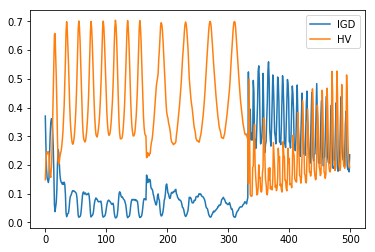

In [17]:
# -*- coding: utf-8 -*-
import geatpy as ea # import geatpy
import matplotlib.pyplot as plt

IGD_List = []
HV_List = []
population = ea.Population(Encoding, Field, NIND)# 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
for i in range(num_evaluations):
    IGDs = []
    HVs = []
    MyAlgorithm = Algorithm_PPS                      # 决定使用哪种基准基因算法
    """================================算法参数设置============================="""
    myAlgorithm = MyAlgorithm(problem, population)   # 实例化一个算法模板对象
    #MyAlgorithm(problem, resultpopulation)
    myAlgorithm.MAXGEN = MAX_GEN                     # 最大进化代数
    myAlgorithm.drawing = 0
    problem.algorithm_reference = myAlgorithm
    """==========================调用算法模板进行种群进化========================"""
    NDSet = myAlgorithm.run()                        # 执行算法模板，得到帕累托最优解集NDSet
    #myAlgorithm.run()
    #NDSet.save()                                     # 把结果保存到文件中
    IGD_List.append(IGDs)
    HV_List.append(HVs)
    print('用时：%s 秒'%(myAlgorithm.passTime))
    print('IGD:', np.mean(IGDs))
    print('HV:', np.mean(HVs))
    
# 复制结果list：
IGD_Algorithm3 = np.mean(np.array(IGD_List.copy()), 0)
HV_Algorithm3 = np.mean(np.array(HV_List.copy()), 0)
print("平均IGD: ", sum(IGD_Algorithm3)/ len(IGD_Algorithm3))
print("平均HV：", sum(HV_Algorithm3) / len(HV_Algorithm3))
plt.plot(range(len(IGD_Algorithm3)), IGD_Algorithm3, range(len(HV_Algorithm3)), HV_Algorithm3)
plt.legend(['IGD', 'HV'])
plt.show()

## PPS Run

用时：36.53016495704651 秒
IGD: 0.35293801183954837
HV: 0.2229999922513962
用时：36.30050992965698 秒
IGD: 0.35237648088736434
HV: 0.22338116206228734
用时：36.32962775230408 秒
IGD: 0.3487020214170515
HV: 0.22573949934542178
用时：36.13164973258972 秒
IGD: 0.3497054603498653
HV: 0.2243521076142788
用时：36.58540177345276 秒
IGD: 0.34334590516845975
HV: 0.22678966516256333
平均IGD:  0.34941357593245814
平均HV： 0.22465248528718954


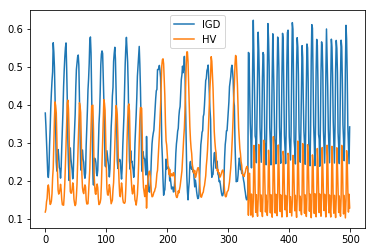

In [18]:
# -*- coding: utf-8 -*-
import geatpy as ea # import geatpy
import matplotlib.pyplot as plt

IGD_List = []
HV_List = []
population = ea.Population(Encoding, Field, NIND)# 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
for i in range(num_evaluations):
    IGDs = []
    HVs = []
    MyAlgorithm = Algorithm_FPS                      # 决定使用哪种基准基因算法
    """================================算法参数设置============================="""
    myAlgorithm = MyAlgorithm(problem, population)   # 实例化一个算法模板对象
    #MyAlgorithm(problem, resultpopulation)
    myAlgorithm.MAXGEN = MAX_GEN                     # 最大进化代数
    myAlgorithm.drawing = 0
    problem.algorithm_reference = myAlgorithm
    """==========================调用算法模板进行种群进化========================"""
    NDSet = myAlgorithm.run()                        # 执行算法模板，得到帕累托最优解集NDSet
    #myAlgorithm.run()
    #NDSet.save()                                     # 把结果保存到文件中
    IGD_List.append(IGDs)
    HV_List.append(HVs)
    print('用时：%s 秒'%(myAlgorithm.passTime))
    print('IGD:', np.mean(IGDs))
    print('HV:', np.mean(HVs))
    
# 复制结果list：
IGD_Algorithm4 = np.mean(np.array(IGD_List.copy()), 0)
HV_Algorithm4 = np.mean(np.array(HV_List.copy()), 0)
print("平均IGD: ", sum(IGD_Algorithm4)/ len(IGD_Algorithm4))
print("平均HV：", sum(HV_Algorithm4) / len(HV_Algorithm4))
plt.plot(range(len(IGD_Algorithm4)), IGD_Algorithm4, range(len(HV_Algorithm4)), HV_Algorithm4)
plt.legend(['IGD', 'HV'])
plt.show()

## COLPPS Run

clear
clear
用时：53.32847309112549 秒
IGD: 0.13222646983179662
HV: 0.390860679641366
clear
用时：58.540666818618774 秒
IGD: 0.17205797548175222
HV: 0.35698807118833065
clear
clear
用时：53.48258066177368 秒
IGD: 0.1317662753881061
HV: 0.3920131093710661
clear
clear
用时：53.77245116233826 秒
IGD: 0.14018290049092963
HV: 0.38441270342469214
clear
clear
用时：53.632912158966064 秒
IGD: 0.1273947597334101
HV: 0.3937663934677839
平均IGD:  0.14072567618519893
平均HV： 0.3836081914186479


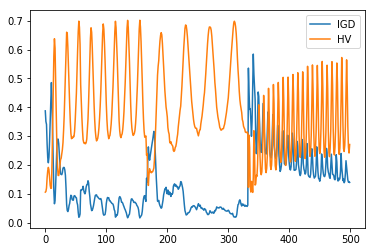

In [19]:
# -*- coding: utf-8 -*-
import geatpy as ea # import geatpy
import matplotlib.pyplot as plt

IGD_List = []
HV_List = []
population = ea.Population(Encoding, Field, NIND)# 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
for i in range(num_evaluations):
    IGDs = []
    HVs = []
    MyAlgorithm = Algorithm_Ensemble                 # 决定使用哪种基准基因算法
    """================================算法参数设置============================="""
    myAlgorithm = MyAlgorithm(problem, population)   # 实例化一个算法模板对象
    #MyAlgorithm(problem, resultpopulation)
    myAlgorithm.MAXGEN = MAX_GEN                     # 最大进化代数
    myAlgorithm.drawing = 0
    problem.algorithm_reference = myAlgorithm
    """==========================调用算法模板进行种群进化========================"""
    NDSet = myAlgorithm.run()                        # 执行算法模板，得到帕累托最优解集NDSet
    #myAlgorithm.run()
    #NDSet.save()                                     # 把结果保存到文件中
    IGD_List.append(IGDs)
    HV_List.append(HVs)
    print('用时：%s 秒'%(myAlgorithm.passTime))
    print('IGD:', np.mean(IGDs))
    print('HV:', np.mean(HVs))
    
# 复制结果list：
IGD_Algorithm5 = np.mean(np.array(IGD_List.copy()), 0)
HV_Algorithm5 = np.mean(np.array(HV_List.copy()), 0)
print("平均IGD: ", sum(IGD_Algorithm5)/ len(IGD_Algorithm5))
print("平均HV：", sum(HV_Algorithm5) / len(HV_Algorithm5))
plt.plot(range(len(IGD_Algorithm5)), IGD_Algorithm5, range(len(HV_Algorithm5)), HV_Algorithm5)
plt.legend(['IGD', 'HV'])
plt.show()

## COLPPS Run (Without Concept Drift Detection and Restarting)

用时：66.38215112686157 秒
IGD: 0.12825447401215456
HV: 0.3920201111137867
用时：63.790985107421875 秒
IGD: 0.1294524519365638
HV: 0.3913052862286568
用时：64.11098408699036 秒
IGD: 0.13500698392712532
HV: 0.390867017775774
用时：65.3918809890747 秒
IGD: 0.12266529978964738
HV: 0.3979459376335144
用时：65.87729358673096 秒
IGD: 0.13207689632362396
HV: 0.3924414691478014
平均IGD:  0.12949122119782294
平均HV： 0.39291596437990667


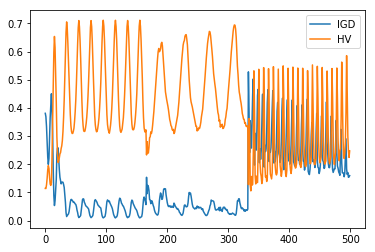

In [20]:
# -*- coding: utf-8 -*-
import geatpy as ea # import geatpy
import matplotlib.pyplot as plt

IGD_List = []
HV_List = []
population = ea.Population(Encoding, Field, NIND)# 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
for i in range(num_evaluations):
    IGDs = []
    HVs = []
    MyAlgorithm = Algorithm_Ensemble_NoCD            # 决定使用哪种基准基因算法
    """================================算法参数设置============================="""
    myAlgorithm = MyAlgorithm(problem, population)   # 实例化一个算法模板对象
    #MyAlgorithm(problem, resultpopulation)
    myAlgorithm.MAXGEN = MAX_GEN                     # 最大进化代数
    myAlgorithm.drawing = 0
    problem.algorithm_reference = myAlgorithm
    """==========================调用算法模板进行种群进化========================"""
    NDSet = myAlgorithm.run()                        # 执行算法模板，得到帕累托最优解集NDSet
    #myAlgorithm.run()
    #NDSet.save()                                     # 把结果保存到文件中
    IGD_List.append(IGDs)
    HV_List.append(HVs)
    print('用时：%s 秒'%(myAlgorithm.passTime))
    print('IGD:', np.mean(IGDs))
    print('HV:', np.mean(HVs))
    
# 复制结果list：
IGD_Algorithm6 = np.mean(np.array(IGD_List.copy()), 0)
HV_Algorithm6 = np.mean(np.array(HV_List.copy()), 0)
print("平均IGD: ", sum(IGD_Algorithm6)/ len(IGD_Algorithm6))
print("平均HV：", sum(HV_Algorithm6) / len(HV_Algorithm6))
plt.plot(range(len(IGD_Algorithm6)), IGD_Algorithm6, range(len(HV_Algorithm6)), HV_Algorithm6)
plt.legend(['IGD', 'HV'])
plt.show()

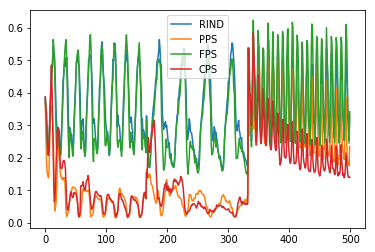

In [21]:
plt.plot(range(len(IGD_Algorithm2)), IGD_Algorithm2, range(len(IGD_Algorithm3)), IGD_Algorithm3, range(len(IGD_Algorithm4)), IGD_Algorithm4, range(len(IGD_Algorithm5)), IGD_Algorithm5)
plt.legend(['RIND', 'PPS', 'FPS', 'CPS'])
plt.show()